# Essential Libraries

In [2]:
!pip install opencv-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 21.3 MB/s eta 0:00:00


In [3]:
!pip install tensorflow
import tensorflow
from tensorflow import keras
from keras import Sequential,layers
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization
import cv2
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Extraction

In [5]:
ds = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Deep learning/CNN/Plant_disease_augmentation/Plant_disease_augmented/Plant Disease',
    image_size=(256,256),
    labels='inferred',
    batch_size=32,
    shuffle=True,
    seed=42
)

Found 3015 files belonging to 3 classes.


In [6]:
for image_batch,labels_batch in ds.take(3):
  print(image_batch.shape)
  print(labels_batch.numpy())

(32, 256, 256, 3)
[2 1 2 2 1 2 2 1 2 1 2 1 1 2 0 1 0 2 0 0 0 1 1 2 1 1 1 0 0 0 1 0]
(32, 256, 256, 3)
[2 0 2 0 1 1 1 2 0 0 2 1 1 0 0 0 2 2 2 2 0 1 1 0 2 1 0 2 1 1 0 0]
(32, 256, 256, 3)
[2 1 0 2 1 0 2 1 2 2 2 1 0 0 1 1 1 2 0 0 0 0 0 1 1 1 0 2 1 1 0 2]


In [7]:
ds.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

**Highly Imbalanced Data**
1. Early_Blight_Leaves - 1000
2. Late_Blight_Leaves  - 1000
3. Healthy_Leaves      - 152

## Data augmentation for healthy leaves

In [8]:

'''import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img
import numpy as np

# Path to the healthy folder
folder_path = "/content/drive/MyDrive/Colab Notebooks/Plant Disease/Potato___healthy"

# Count existing images
existing_images = [f for f in os.listdir(folder_path) if f.lower().endswith(('.jpg', '.png', '.jpeg'))]
num_existing = len(existing_images)
target_num = 1000
num_to_generate = target_num - num_existing

if num_to_generate <= 0:
    print("Already have 1000 or more images. No augmentation needed.")
else:
    print(f"Augmenting {num_to_generate} new images...")

    # Data augmentation generator
    datagen = ImageDataGenerator(
        rotation_range=25,
        width_shift_range=0.15,
        height_shift_range=0.15,
        shear_range=0.15,
        zoom_range=0.2,
        horizontal_flip=True,
        brightness_range=[0.8, 1.2],
        fill_mode='nearest'
    )

    save_count = 0
    while save_count < num_to_generate:
        for img_name in existing_images:
            img_path = os.path.join(folder_path, img_name)
            img = load_img(img_path)
            x = img_to_array(img)
            x = np.expand_dims(x, axis=0)

            for batch in datagen.flow(x, batch_size=1):
                new_filename = f"aug_{save_count}_{img_name}"
                save_img(os.path.join(folder_path, new_filename), batch[0])
                save_count += 1
                if save_count >= num_to_generate:
                    break
            if save_count >= num_to_generate:
                break

    print(f"✅ Augmentation complete! Total images: {target_num}")
'''

'import os\nfrom tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img, save_img\nimport numpy as np\n\n# Path to the healthy folder\nfolder_path = "/content/drive/MyDrive/Colab Notebooks/Plant Disease/Potato___healthy"\n\n# Count existing images\nexisting_images = [f for f in os.listdir(folder_path) if f.lower().endswith((\'.jpg\', \'.png\', \'.jpeg\'))]\nnum_existing = len(existing_images)\ntarget_num = 1000\nnum_to_generate = target_num - num_existing\n\nif num_to_generate <= 0:\n    print("Already have 1000 or more images. No augmentation needed.")\nelse:\n    print(f"Augmenting {num_to_generate} new images...")\n\n    # Data augmentation generator\n    datagen = ImageDataGenerator(\n        rotation_range=25,\n        width_shift_range=0.15,\n        height_shift_range=0.15,\n        shear_range=0.15,\n        zoom_range=0.2,\n        horizontal_flip=True,\n        brightness_range=[0.8, 1.2],\n        fill_mode=\'nearest\'\n    )\n\n    save_count

# Train,Val,Test split

In [9]:
full_ds = keras.utils.image_dataset_from_directory(
    '/content/drive/MyDrive/Colab Notebooks/Deep learning/CNN/Plant_disease_augmentation/Plant_disease_augmented/Plant Disease',
    image_size=(224,224),
    labels='inferred',
    batch_size=32,
    shuffle=True,
    seed=42
)

Found 3015 files belonging to 3 classes.


In [10]:
size = len(full_ds)
train_size = int(0.8 * size)
val_size = int(0.1 * size)
test_size = size - train_size - val_size

train_ds = full_ds.take(train_size)
val_ds = full_ds.skip(train_size).take(val_size)
test_ds = full_ds.skip(train_size + val_size)

In [11]:
for image_batch,labels_batch in train_ds.take(3):
  print(image_batch.shape)
  print(labels_batch.numpy())

(32, 224, 224, 3)
[2 1 2 2 1 2 2 1 2 1 2 1 1 2 0 1 0 2 0 0 0 1 1 2 1 1 1 0 0 0 1 0]
(32, 224, 224, 3)
[2 0 2 0 1 1 1 2 0 0 2 1 1 0 0 0 2 2 2 2 0 1 1 0 2 1 0 2 1 1 0 0]
(32, 224, 224, 3)
[2 1 0 2 1 0 2 1 2 2 2 1 0 0 1 1 1 2 0 0 0 0 0 1 1 1 0 2 1 1 0 2]


# Model Buidling

In [12]:
rescale = Sequential([
    layers.Rescaling(1./255,input_shape=(224,224,3))
])
data_augment = Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2)
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
model1 = Sequential([
    rescale,
    data_augment,
])

# Block1
model1.add(Conv2D(32,(3,3),activation='relu'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.2))
model1.add(Conv2D(32,(3,3),activation='relu'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.2))

# Block2
model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.2))
model1.add(Conv2D(64,(3,3),activation='relu'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.2))

# Block3
model1.add(Conv2D(128,(3,3),activation='relu'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.2))
model1.add(Conv2D(128,(3,3),activation='relu'))
model1.add(MaxPooling2D((2,2)))
model1.add(Dropout(0.2))

# Block4
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(3,activation='softmax'))

In [14]:
model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 295,459 (1.13 MB)

 Trainable params: 295,459 (1.13 MB)

 Non-trainable params: 0 (0.00 B)

# Model Training

In [15]:
model1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [16]:
model1_history = model1.fit(train_ds,epochs=15,validation_data=val_ds,verbose=1,batch_size=32)

Epoch 1/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 84s 1s/step - accuracy: 0.3588 - loss: 1.1034 - val_accuracy: 0.4444 - val_loss: 1.0318
Epoch 2/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.5820 - loss: 0.8426 - val_accuracy: 0.4514 - val_loss: 1.0527
Epoch 3/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8147 - loss: 0.4896 - val_accuracy: 0.7812 - val_loss: 0.5299
Epoch 4/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 78s 1s/step - accuracy: 0.9076 - loss: 0.2818 - val_accuracy: 0.8785 - val_loss: 0.3280
Epoch 5/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8997 - loss: 0.2816 - val_accuracy: 0.8160 - val_loss: 0.4474
Epoch 6/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 79s 1s/step - accuracy: 0.9152 - loss: 0.2261 - val_accuracy: 0.9375 - val_loss: 0.2568
Epoch 7/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9283 - loss: 0.2137 - val_accuracy: 0.9271 - val_loss: 0.2673
Epoch 8/15
76/76 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.9301 - loss: 0.2126 - val_accuracy: 0.5278 - val_loss:

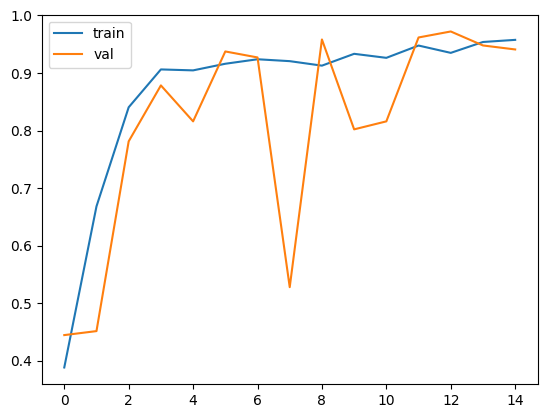

In [18]:
plt.plot(model1_history.history['accuracy'],label='train')
plt.plot(model1_history.history['val_accuracy'],label='val')
plt.legend()
plt.show()

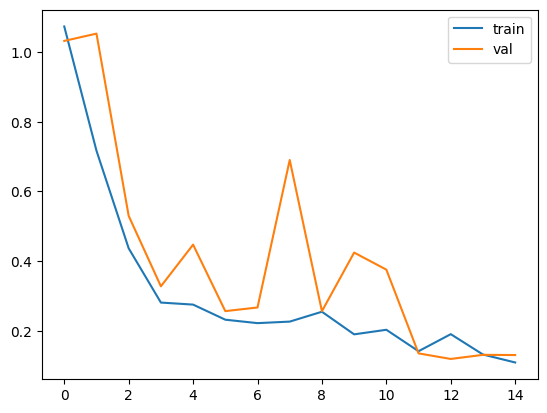

In [19]:
plt.plot(model1_history.history['loss'],label='train')
plt.plot(model1_history.history['val_loss'],label='val')
plt.legend()
plt.show()

In [20]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,precision_score,f1_score
import seaborn as sns

In [21]:
y_true = []
y_pred = []

for image_batch, label_batch in test_ds:
    y_true.extend(label_batch.numpy())
    y_pred.extend(np.argmax(model1.predict(image_batch), axis=1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 185ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 260ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 187ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step


Overall Accuracy: 0.9661016949152542
Overall Precision: 0.9690239625949738
Overall F1 score: 0.966206806443721

Confusion Matrix:
 [[ 83   8   0]
 [  0 106   0]
 [  0   2  96]]


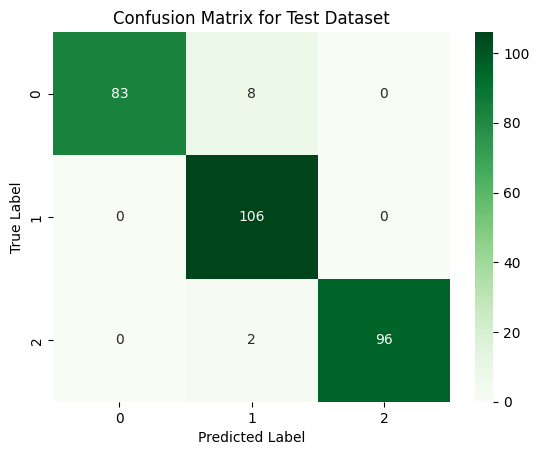

In [31]:
print("Overall Accuracy:", accuracy_score(y_true, y_pred))
print("Overall Precision:", precision_score(y_true, y_pred, average='weighted'))
print("Overall F1 score:", f1_score(y_true, y_pred, average='weighted'))
print("\nConfusion Matrix:\n", confusion_matrix(y_true, y_pred))

sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Test Dataset')
plt.show()

# Using Batch normalization

In [ ]:
model3 = Sequential([
    rescale,
    data_augment,
])

# Block1
model3.add(Conv2D(32,(3,3),activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2,2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(32,(3,3),activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2,2)))
model3.add(Dropout(0.2))

# Block2
model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2,2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(64,(3,3),activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2,2)))
model3.add(Dropout(0.2))

# Block3
model3.add(Conv2D(128,(3,3),activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2,2)))
model3.add(Dropout(0.2))
model3.add(Conv2D(128,(3,3),activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D((2,2)))
model3.add(Dropout(0.2))

# Block4
model3.add(Flatten())
model3.add(Dense(64,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dropout(0.2))
model3.add(Dense(3,activation='softmax'))

In [ ]:
model3.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_21          │ (None, 222, 222, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_36 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 109, 109, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_22          │ (None, 109, 109, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_44 (Dropout)            │ (None, 54, 54, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 52, 52, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_23          │ (None, 52, 52, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_45 (Dropout)            │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 24, 24, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 24, 24, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_46 (Dropout)            │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 10, 10, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_47 (Dropout)            │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 297,507 (1.13 MB)

 Trainable params: 296,483 (1.13 MB)

 Non-trainable params: 1,024 (4.00 KB)

In [ ]:
model3.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model3_history = model3.fit(train_ds,validation_data=val_ds,verbose=1,epochs=20)

Epoch 1/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 24s 242ms/step - accuracy: 0.8205 - loss: 0.4708 - val_accuracy: 0.3160 - val_loss: 1.8394
Epoch 2/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 227ms/step - accuracy: 0.9146 - loss: 0.2433 - val_accuracy: 0.3438 - val_loss: 3.4704
Epoch 3/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 228ms/step - accuracy: 0.9309 - loss: 0.1761 - val_accuracy: 0.3646 - val_loss: 3.4391
Epoch 4/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 239ms/step - accuracy: 0.9415 - loss: 0.1667 - val_accuracy: 0.3507 - val_loss: 5.4096
Epoch 5/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 238ms/step - accuracy: 0.9405 - loss: 0.1762 - val_accuracy: 0.3646 - val_loss: 3.7094
Epoch 6/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 17s 220ms/step - accuracy: 0.9464 - loss: 0.1333 - val_accuracy: 0.3472 - val_loss: 4.1549
Epoch 7/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 242ms/step - accuracy: 0.9652 - loss: 0.0959 - val_accuracy: 0.4653 - val_loss: 2.8208
Epoch 8/20
75/75 ━━━━━━━━━━━━━━━━━━━━ 18s 233ms/step - accuracy: 0.9762 - loss: 0.0818 - val_accu

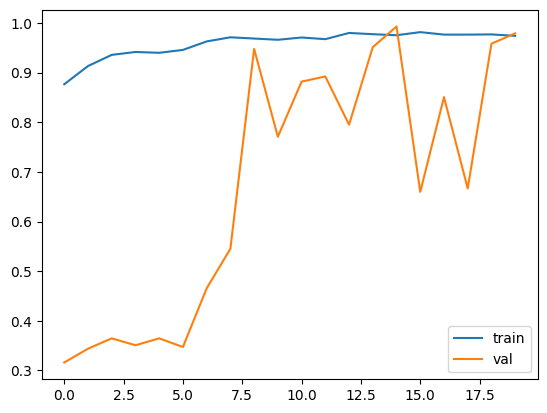

In [ ]:
plt.plot(model3_history.history['accuracy'],label='train')
plt.plot(model3_history.history['val_accuracy'],label='val')
plt.legend()
plt.show()

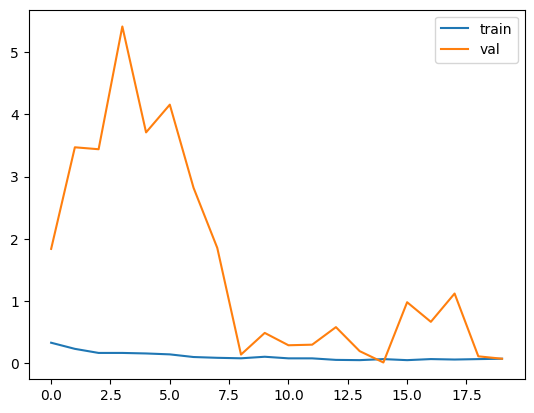

In [ ]:
plt.plot(model3_history.history['loss'],label='train')
plt.plot(model3_history.history['val_loss'],label='val')
plt.legend()
plt.show()

**Unstable Training**

# Using Transfer Learning --> Feature extraction

In [26]:
from keras.applications import MobileNetV2,EfficientNetB0
base_model = EfficientNetB0(include_top=False,weights='imagenet',input_shape=(224,224,3))

# Freeze all layers
for layer in base_model.layers:
  layer.trainable = False

# Unfreeze the last 40 layers
for layer in base_model.layers[-40:]:
  layer.trainable = True

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [27]:
model2 = Sequential([
    rescale,
    data_augment,
    base_model,
    Flatten(),
    Dense(64,activation='relu'),
    Dropout(0.2),
    Dense(3,activation='softmax')
])

In [28]:
model2.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [29]:
model2.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 7, 7, 1280)     │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 62720)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     4,014,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,063,910 (30.76 MB)

 Trainable params: 6,065,043 (23.14 MB)

 Non-trainable params: 1,998,867 (7.63 MB)

In [30]:
model2_history = model2.fit(train_ds,validation_data=val_ds,verbose=1,epochs=10)

Epoch 1/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 130s 2s/step - accuracy: 0.3205 - loss: 2.9449 - val_accuracy: 0.3507 - val_loss: 1.0985
Epoch 2/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.3317 - loss: 1.0987 - val_accuracy: 0.3438 - val_loss: 1.0985
Epoch 3/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.3332 - loss: 1.0986 - val_accuracy: 0.3368 - val_loss: 1.0984
Epoch 4/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.3276 - loss: 1.0986 - val_accuracy: 0.3681 - val_loss: 1.0985
Epoch 5/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 119s 2s/step - accuracy: 0.3290 - loss: 1.0986 - val_accuracy: 0.3368 - val_loss: 1.0984
Epoch 6/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.3143 - loss: 1.0987 - val_accuracy: 0.3333 - val_loss: 1.0985
Epoch 7/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.3283 - loss: 1.0986 - val_accuracy: 0.3542 - val_loss: 1.0986
Epoch 8/10
76/76 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.3329 - loss: 1.0986 - val_accuracy: 0.3472 - v